In [134]:
### ZFor running on google colab
# from google.colab import drive

# drive.mount('/content/gdrive')

# %cd /content/gdrive/MyDrive/SER_Capstone/




/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import random
import sys

# librosa is a Python library for analyzing audio and music. 
import librosa
import librosa.display
# import librosa.display.waveplot # seems to not exist anymore

from scipy import signal 
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# to play the audio files
import IPython.display as ipd



# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils
# from tensorflow.keras.utils import to_categorical

# from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [136]:
"""#Paths listed out


#Bea - Female
"/EmoV-DB_sorted/bea/Amused"
"/EmoV-DB_sorted/bea/Angry"
"/EmoV-DB_sorted/bea/Disgusted"
"/EmoV-DB_sorted/bea/Neutral"
"/EmoV-DB_sorted/bea/Sleepy"

#Jenie - Female
"/EmoV-DB_sorted/jenie/Amused"
"/EmoV-DB_sorted/jenie/Angry"
"/EmoV-DB_sorted/jenie/Disgusted"
"/EmoV-DB_sorted/jenie/Neutral"
"/EmoV-DB_sorted/jenie/Sleepy"


#Josh - Male
"/EmoV-DB_sorted/josh/Amused"
"/EmoV-DB_sorted/josh/Neutral"
"/EmoV-DB_sorted/josh/Sleepy"


#Sam - Male
"/EmoV-DB_sorted/sam/Amused"
"/EmoV-DB_sorted/sam/Angry"
"/EmoV-DB_sorted/sam/Disgusted"
"/EmoV-DB_sorted/sam/Neutral"
"/EmoV-DB_sorted/sam/Sleepy"
"""

# Don't delete! can be used for easy random path for selection

# rand_dir = 


# random_file = random.choice(os.listdir(rand_dir))




'#Paths listed out\n\n\n#Bea - Female\n"/EmoV-DB_sorted/bea/Amused"\n"/EmoV-DB_sorted/bea/Angry"\n"/EmoV-DB_sorted/bea/Disgusted"\n"/EmoV-DB_sorted/bea/Neutral"\n"/EmoV-DB_sorted/bea/Sleepy"\n\n#Jenie - Female\n"/EmoV-DB_sorted/jenie/Amused"\n"/EmoV-DB_sorted/jenie/Angry"\n"/EmoV-DB_sorted/jenie/Disgusted"\n"/EmoV-DB_sorted/jenie/Neutral"\n"/EmoV-DB_sorted/jenie/Sleepy"\n\n\n#Josh - Male\n"/EmoV-DB_sorted/josh/Amused"\n"/EmoV-DB_sorted/josh/Neutral"\n"/EmoV-DB_sorted/josh/Sleepy"\n\n\n#Sam - Male\n"/EmoV-DB_sorted/sam/Amused"\n"/EmoV-DB_sorted/sam/Angry"\n"/EmoV-DB_sorted/sam/Disgusted"\n"/EmoV-DB_sorted/sam/Neutral"\n"/EmoV-DB_sorted/sam/Sleepy"\n'

In [137]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                 
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    if file.startswith('.'):
                        pass
                    else:
                        file_emotion.append(emotions.lower())
                        file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                        file_actor.append(dir)
     

In [138]:
print(f'Number oaf file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number oaf file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [139]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

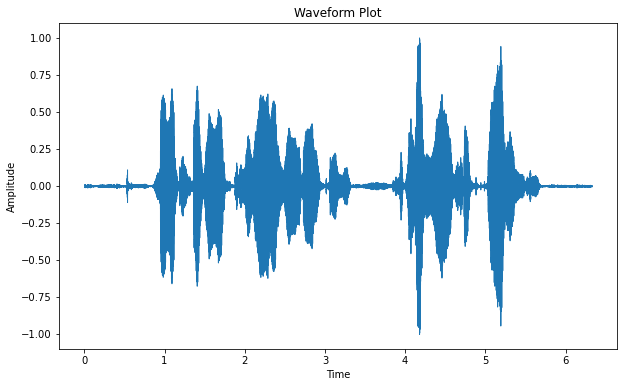

In [140]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_00003.wav')





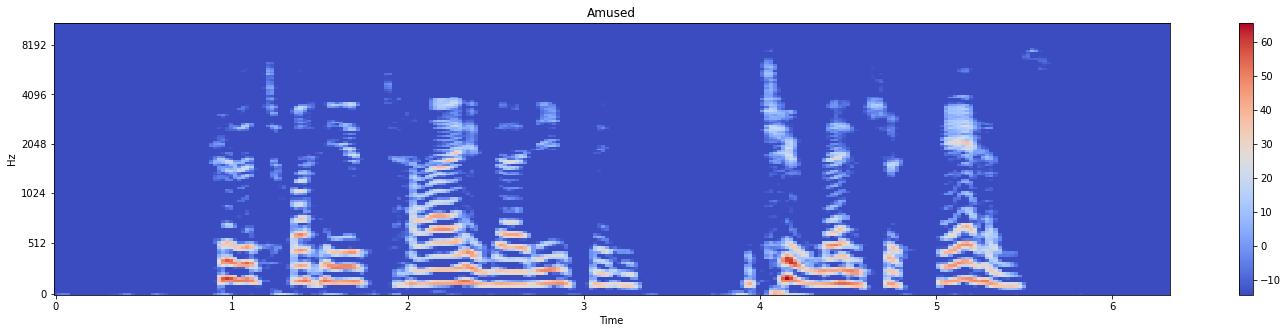

In [141]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(25, 5))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

## EDA Visuals

In [211]:
df.emotion.value_counts()

sleepy       1721
neutral      1568
amused       1317
angry        1268
disgusted    1019
Name: emotion, dtype: int64

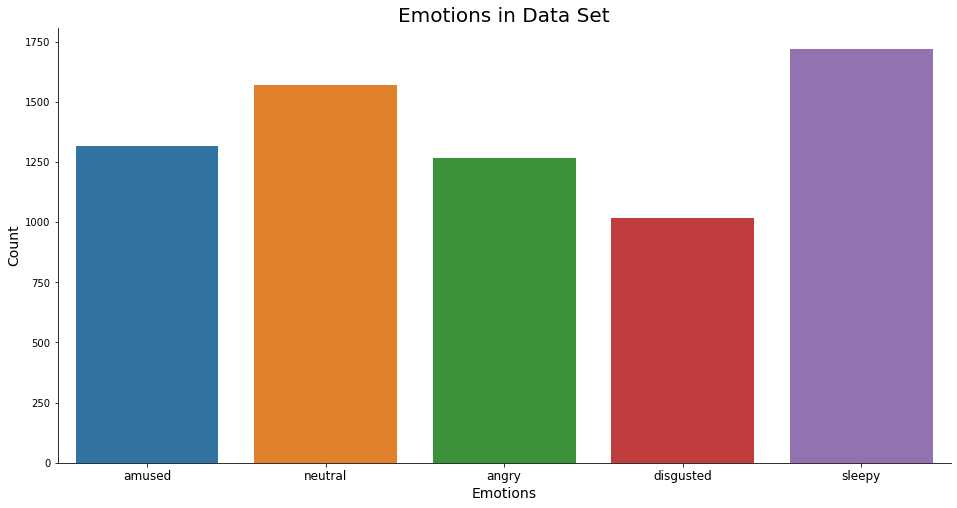

In [212]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.emotion)
plt.title('Emotions in Data Set', size=20)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Emotion_count')
plt.show()

sam      2453
jenie    1790
bea      1787
josh      863
Name: actor, dtype: int64


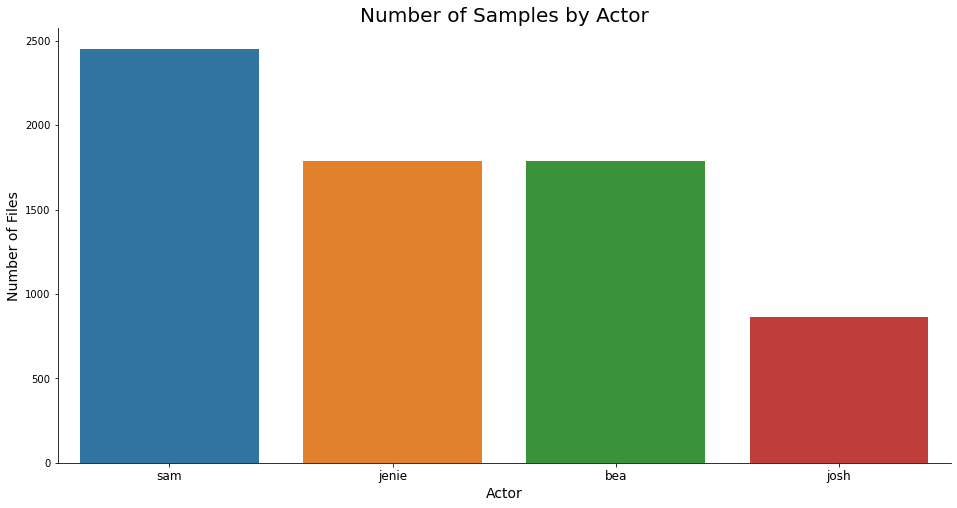

In [213]:
print(df.actor.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.actor)
plt.title('Number of Samples by Actor', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Actor', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Actor_count')
plt.show()

female    3577
male      3316
Name: sex, dtype: int64


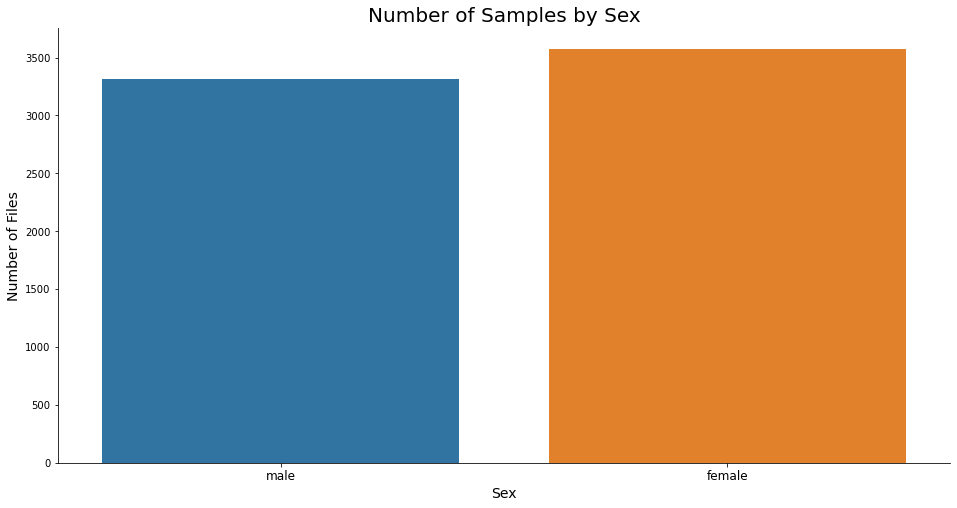

In [226]:
print(df.sex.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.sex)
plt.title('Number of Samples by Sex', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Sex', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/sex_count')
plt.show()

In [144]:
#Perform test train split - .25% test

In [145]:
#Consider switch to google colab for processing power

#Baseline Idea.  if line/waveform do multinomial naive bayes
# images unforuntately have to do a cnn

In [146]:

        
        
        
        
        
        
# Save images to anaylze to new folder 
# add folder to .gitignore

We will need to agument data to account for the variablity in human speech and audio equipment 
Will add random whitenoise
Will randomly speed up/slow down audio
NO PITCH CHANGE!

Will then do Time and Frequency Masking with SpecAugment to prevent overfitting and to help the model generalise better. The masked sections are replaced with the mean value. https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5 for markdown info writeup


## Augmenting the Data

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

# Will come back to Data Augmentation later for MVP


# For now lets just convert to raw spectrograms for the baseline


In [147]:
def spectrogrammer(path):
    
    audio_data, sampling_rate = librosa.load(path)
    
    spectro = librosa.feature.melspectrogram(audio_data)
    
    s_db = librosa.amplitude_to_db(spectro)
    
    fig, ax = plt.subplots(figsize=(20, 5))
    
    new_s = librosa.display.specshow(s_db, sr=sampling_rate, ax=ax)
    
#     ax.set(title=f"{path}")
    
#     fig.colorbar(new_s, ax=ax) #good for my analysis but not needed for CNN
    os.path.basename(path)

    path_stripped = os.path.basename(path).strip(".wav")
    
    unique_name = path_stripped
#     ax.set(title=f"{unique_name}")    
    new_path = ('img/spectrograms_no_aug_color/'+ unique_name)
    plt.savefig(new_path)

In [148]:
import opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram



def spectrogrammer2(patho):
    
    audio_object = Audio.from_file(patho)
    spectrogram_object = Spectrogram.from_audio(audio_object)
    image = spectrogram_object.to_image(shape=(512,1024))
    path_stripped = os.path.basename(patho).strip(".wav")
    unique_name = path_stripped
    new_path = ('img/spectrograms_no_aug_bw/'+ unique_name)
    image.save(new_path+".png")

#Much, Much, Much faster but in b&W

In [149]:
# tester = df.head()

# tester["file_path"].apply(lambda x: spectrogrammer2(x))

In [150]:
# df.head()
df["file_path"].count()

6893

In [151]:
# df["file_path"].apply(lambda x: spectrogrammer(x))#Use color image for better contrast
# df["file_path"].apply(lambda x: spectrogrammer2(x)) #Use color image for better contrast

In [152]:
img_path = 'img/'
img_dir_list = os.listdir(img_path) 
img_dir_list.sort

non_aug_path = []

for dir in img_dir_list:
    if dir.startswith('spectrograms_no_aug_color'):
        files = os.listdir(img_path + dir)
        for file in files:
            if file.startswith('.'):
                pass
            else:
                non_aug_path.append(img_path + dir + '/' + file)
    else: 
        pass
    
    

In [153]:
len(non_aug_path)

6893

In [161]:
non_aug_path

['img/spectrograms_no_aug_color/sam_amused_00159.png',
 'img/spectrograms_no_aug_color/sam_neutral_00372.png',
 'img/spectrograms_no_aug_color/jenie_sleepy_00269.png',
 'img/spectrograms_no_aug_color/jenie_disgusted_00169.png',
 'img/spectrograms_no_aug_color/sam_neutral_00414.png',
 'img/spectrograms_no_aug_color/bea_sleepy_00003.png',
 'img/spectrograms_no_aug_color/bea_sleepy_00017.png',
 'img/spectrograms_no_aug_color/sam_neutral_00400.png',
 'img/spectrograms_no_aug_color/sam_neutral_00366.png',
 'img/spectrograms_no_aug_color/josh_neutral00248.png',
 'img/spectrograms_no_aug_color/jenie_amused_00188.png',
 'img/spectrograms_no_aug_color/sam_disgust_00077.png',
 'img/spectrograms_no_aug_color/josh_neutral00260.png',
 'img/spectrograms_no_aug_color/sam_amused_00165.png',
 'img/spectrograms_no_aug_color/bea_neutral_00112.png',
 'img/spectrograms_no_aug_color/jenie_neutral_00181.png',
 'img/spectrograms_no_aug_color/sam_sleepy_00290.png',
 'img/spectrograms_no_aug_color/jenie_sleepy_

In [157]:
df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


In [172]:
new_thing = [] 


test_list = ['EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav', \
               'EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav', \
               'EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav', \
               'EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav', \
               'EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav', \
               'EmoV-DB_sorted/sam/Amused/sam_amused_00500.wav']
def path_rewriter(items):
    path_pieces = items.split("/", 3)
    stripped = path_pieces[3].strip(".wav")
    return(f"img/spectrograms_no_aug_color/{stripped}.png")



# for x in df.file_path:
#     x.split("!", 1)
# ['abcde', 'mdam!dskm']
    
df["no_aug_img_path"] = df["file_path"].apply(lambda x : path_rewriter(x))

In [173]:
df

,file_path,actor,sex,emotion,no_aug_img_path
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused,img/spectrograms_no_aug_color/sam_amused_00058...
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused,img/spectrograms_no_aug_color/sam_amused_00064...
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused,img/spectrograms_no_aug_color/sam_amused_00070...
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused,img/spectrograms_no_aug_color/sam_amused_00299...
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused,img/spectrograms_no_aug_color/sam_amused_00266...
...,...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy,img/spectrograms_no_aug_color/josh_sleepy00154...
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy,img/spectrograms_no_aug_color/josh_sleepy00140...
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy,img/spectrograms_no_aug_color/josh_sleepy00168...
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy,img/spectrograms_no_aug_color/josh_sleepy00197...


# Now that we have our unaltered spectrograms and the matching ima, we can do our baseline Model for multiclass identification

Go through all files in directory and add to df if name is in original path in new column. If name has emotion can strip it. Can augment sound files and re-save sprectrograms of augmented. (Combine with originals for larger dataset? or just use noisier data ?)

# CHECK FOR CLASS IMBALANCE

RESAMPLE AT CONSTANT RATE??: http://opensoundscape.org/en/latest/tutorials/audio_and_spectrogram.html#:~:text=To%20save%20the%20created%20spectrogram,Library%20(PIL)%20Image%20object.&text=Save%20the%20PIL%20Image%20using,want%20to%20save%20the%20image.

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [96]:
def noise(data):
    amplitude = 0.05*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.5, 1.5), 2)
    return librosa.effects.time_stretch(data, random_rate)


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.5, 3), 1)
    return librosa.effects.pitch_shift(data, sampling_rate, random_pitch)



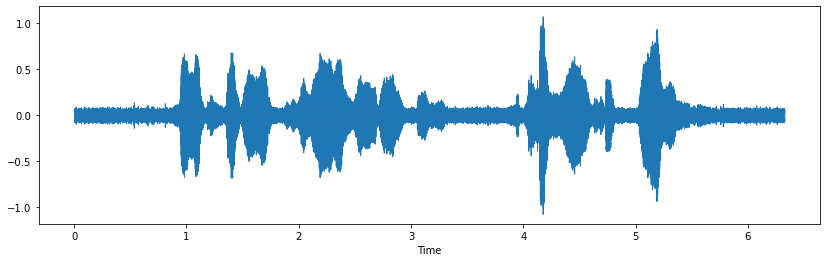

In [97]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate) #Base Audio


x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

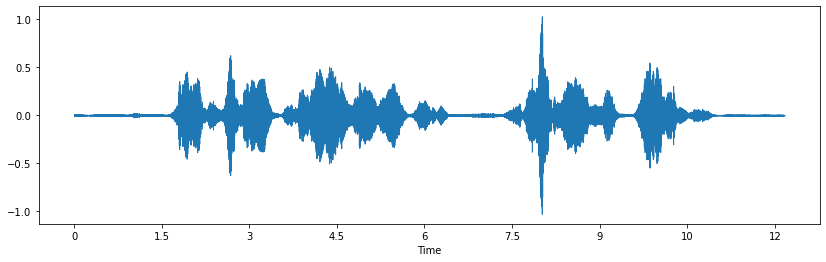

In [98]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

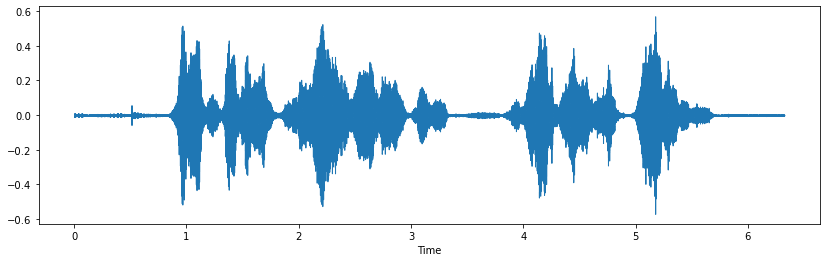

In [99]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
# ipd.Audio(audio_data, rate=sampling_rate)
x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

### Simple Model #1  before further Augmentation and Implementation